# expr1

## Description

Changes in spatial patterning (Ω), temporal patterning (cv) and cross correlation patterning (cor) as a function of weight (g_w) and spikelet (g_k) of the GJ network.

## init macro

In [1]:
import os
import numpy as np

# macro
STIM_CURR = "stim-0.9"
DIR_ROOT = os.path.join("..", "expr1")
DIR_OUTPUTS = os.path.join(DIR_ROOT, "outputs", STIM_CURR)
DIR_FIGS = os.path.join(DIR_ROOT, "figs", STIM_CURR)

## read outputs

In [2]:
# init omegas & cvs & cors
omegas = []; cvs = []; cors = []

# read outputs
for idx in os.listdir(DIR_OUTPUTS):
    omegas.append(np.loadtxt(os.path.join(DIR_OUTPUTS, idx, "omegas.csv"), delimiter = ","))
    cvs.append(np.loadtxt(os.path.join(DIR_OUTPUTS, idx, "cvs.csv"), delimiter = ","))
    cors.append(np.loadtxt(os.path.join(DIR_OUTPUTS, idx, "cors.csv"), delimiter = ","))

# mean outputs
omegas = np.mean(np.array(omegas), axis = 0)
cvs = np.mean(np.array(cvs), axis = 0)
cors = np.mean(np.array(cors), axis = 0)

## plot outputs

<ipython-input-6-47def301ef2a>:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


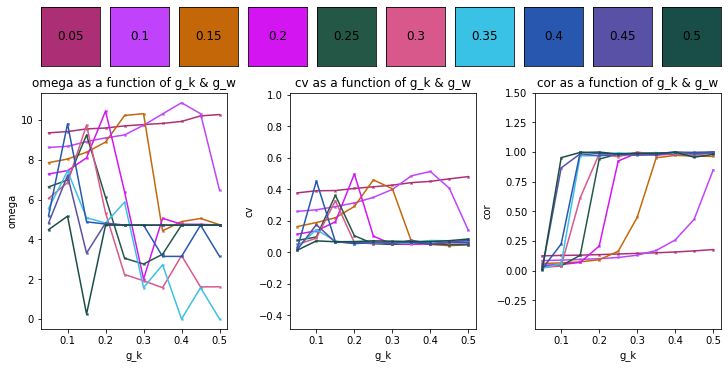

In [6]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# set random.seed
np.random.seed(0)
# init g_ws & g_ks & colors
g_ws = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5]
g_ks = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5]
colors = [np.random.randint(0,256,3)/255. for _ in range(omegas.shape[0])]

# init fig & gs
fig = plt.figure(
    figsize = (10,5),
    constrained_layout = True
)
gs = GridSpec(5, 30, figure = fig)

## axes 1: show colormap
for i in range(len(g_ws)):
    ax1i = fig.add_subplot(gs[0,3*i:3*(i+1)])
    # plot ax1i
    ax1i.set_xticks([]); ax1i.set_yticks([])
    ax1i.set_facecolor(colors[i])
    ax1i.text(0.5, 0.5, g_ws[i],
        va = "center", ha ="center",
        fontsize=12, transform=ax1i.transAxes
    )

## axes 21: show omegas
ax21 = fig.add_subplot(gs[1:,0:10])
for i in range(omegas.shape[0]):
    # plot ax21
    ax21.plot(
        # plot omegas
        g_ks, omegas[i],
        # plot settings
        linestyle = "-", linewidth = 1.5, marker = "x", markersize = 2, color = colors[i]
    )
ax21.set_xlim(left = np.min(g_ks) - .02, right = np.max(g_ks) + .02)
ax21.set_ylim(bottom = np.min(omegas) -.5, top = np.max(omegas) + .5)
ax21.set_xlabel(xlabel = "g_k")
ax21.set_ylabel(ylabel = "omega")
ax21.set_title(label = "omega as a function of g_k & g_w")

## axes 22: show cvs
ax22 = fig.add_subplot(gs[1:,10:20])
for i in range(cvs.shape[0]):
    # plot ax22
    ax22.plot(
        # plot cvs
        g_ks, cvs[i],
        # plot settings
        linestyle = "-", linewidth = 1.5, marker = "x", markersize = 2, color = colors[i]
    )
ax22.set_xlim(left = np.min(g_ks) - .02, right = np.max(g_ks) + .02)
ax22.set_ylim(bottom = np.min(cvs) -.5, top = np.max(cvs) + .5)
ax22.set_xlabel(xlabel = "g_k")
ax22.set_ylabel(ylabel = "cv")
ax22.set_title(label = "cv as a function of g_k & g_w")

## axes 23: show cors
ax23 = fig.add_subplot(gs[1:,20:30])
for i in range(cors.shape[0]):
    # plot ax23
    ax23.plot(
        # plot cors
        g_ks, cors[i],
        # plot settings
        linestyle = "-", linewidth = 1.5, marker = "x", markersize = 2, color = colors[i]
    )
ax23.set_xlim(left = np.min(g_ks) - .02, right = np.max(g_ks) + .02)
ax23.set_ylim(bottom = np.min(cors) -.5, top = np.max(cors) + .5)
ax23.set_xlabel(xlabel = "g_k")
ax23.set_ylabel(ylabel = "cor")
ax23.set_title(label = "cor as a function of g_k & g_w")

# integrate fig
fig.align_xlabels([ax21, ax22, ax23])

# img legend & show
fig.show()

omega: 可能是收集的数据太少了，只进行了3组实验然后平均。但总体趋势我们可以看到在(g_w\*g_k)增大之后，omega会在0.04处附近达到最大值，即发放呈现局部同步。之后omega会迅速衰减至0处附近，然后进行波动，这里波动的主要原因在于omega计算时使用的bin过大，为duration的1/3，本来规律的周期性全局同步发放，由于bin大小设置的缘故，落入不同bin中的spike数目不同，进而导致omega计算不为0。  
cv: 随机发放具备较高的cv值。当(g_w\*g_k)增大之后，cv会先缓慢上升，在其乘积0.04处，发放呈现局部同步。之后迅速下降至0，这时的发放呈现全局同步。  
cor: cor的值随着(g_w\*g_k)的增大而增大， cor在其乘积约为0.05处，接近最大值1。 

## spike pattern

### 1. spike synchronization

#### 1.1 uniform spike

![uniform spike](./figs/expr1/uniform-spike.png)

Description of uniform spike:  
此时的神经元发放呈现随机均匀分布，具备较低的global相关性（cor）以及中等程度的时间局部相关性（omega & cv）。该现象主要在(g_w\*g_k)值较小的时候出现，在这项实验中g_w=0.05的处理组基本都处于这种发放模式。

#### 1.2 local syn

![local syn g_w](./figs/expr1/local-syn-g_w.png)
![local syn g_k](./figs/expr1/local-syn-g_k.png)

Description of local syn:  
在上面两张图中，(g_k\*g\_w)的值都为0.04，但是上面的那一张图g_w大一些，为0.2，下面那一张图的g_w小一些为0.1。可以看到g_w的影响更大一些，发放更加稀疏，局部化发放也更加明显。同时，依据cor的趋势，该情况下的cor值较低。  
局部相关现象的原因在于(g_w\*g_k)值的增大导致了同步化的加强，而初始时的gaussian随机初始化与刺激的noise，都造成了局部的电位强化，而gap junction的同步化将其由单个神经元扩散到近邻神经元，其局部同步发放现象表示了局部神经元处于较为相近的活跃状态，并增强这种状态。

#### 1.3 global syn

![global syn](./figs/expr1/global-syn.png)

Description of global syn:  
此时，神经元发放处于高度同步化状态，cor值接近1，时间局部敏感性（omega & cv）较低。

### 2. spike sparsity

![dense spike](./figs/expr1/dense-spike.png)
![sparse spike](./figs/expr1/sparse-spike.png)

Description of spike sparsity:  
上图中的(g_w\*g_k)值是相同的，但是上面那一张图的g_w更小一些。在(g_w\*g_k)值恒定时，随着g_w的变大，spike的发放会变得更加稀疏，这种情况不仅在uniform spike中存在，还在local syn与global syn的中存在。上面的local syn的两个例子其实比较omega、cv与cor等值是没有统计差异的，而是受到了稀疏性的影响，令人觉得稀疏的spike发放更局部化一些。  
产生该现象的主要原因，我认为在于g_k主管spikelet，当g_k变小时，即在弱化spike的影响，而增强电压同步的影响。在spike发放之后，神经元进入不应期，在这段时间内电压保持u_reset，从而拉低其它神经元的电位，使整体变得难以发放spike。